# Pizza Sales EDA Qs
* Most popular hours / weekdays
* Most popular pizzas
* Most popular ingredients
* Highest revenue pizzas
* All about orders
* 2-Pizza combos

## References
* [Data Set from Kaggle](https://www.kaggle.com/datasets/shilongzhuang/pizza-sales)
* [Exploratory Data Analysis with Python and Pandas - Analyzing Pizza Restaurant's Data | MaKuData](https://www.youtube.com/watch?v=ypR1GKWbmx0&ab_channel=MaKuData)

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [184]:
# "pip install openpyxl" to read excel sheets
df = pd.read_excel("/Users/harekrsna/Desktop/Work/Instant-Python/projects/kaggle_pizza_sales_eda/data_model_pizza_sales.xlsx")

In [185]:
df.head(5) # show first 5 rows. Defaults to 5

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [186]:
df.info() # table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [187]:
df.isna().sum() # check missing values - check to clean data or not. Here 0 means no misisng values in any col so no need to clean

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

# Q1. Most popular hours / weekdays

In [188]:
# Create new col "weekday"
df["weekday"] = df["order_date"].dt.dayofweek

In [189]:
# 0 is monday, 6 is sunday
df["weekday"].value_counts()

weekday
4    8106
5    7355
3    7323
2    6797
1    6753
0    6369
6    5917
Name: count, dtype: int64

In [190]:
# Create new col "month"
df["month"] = df["order_date"].dt.month

In [191]:
df["weekday"].value_counts()

weekday
4    8106
5    7355
3    7323
2    6797
1    6753
0    6369
6    5917
Name: count, dtype: int64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  weekday            48620 non-null  int32         
 13  month              48620 non-null  int32         
dtypes: dat

In [193]:
# apply custom functionality on a col - if u apply this twice it throws error as the operation is in-place and in the 2nd run the int is replaced with string, it compares an int to a string
def day_of_week(x):
    weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    if 0 <= x <= 6:
        return weekdays[x]

df["weekday"] = df["weekday"].apply(day_of_week)

In [194]:
df["weekday"].value_counts()

weekday
Thursday     8106
Friday       7355
Wednesday    7323
Tuesday      6797
Monday       6753
Sunday       6369
Saturday     5917
Name: count, dtype: int64

In [195]:
# Convert "order_time" from date type to string. Then create new col "hour" and extract hour from "order_time" string
df["order_time"] = df["order_time"].astype(str)
df["hour"] = df["order_time"].apply(lambda x : x.split(":")[0])

In [196]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,weekday,month,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Wednesday,1,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Wednesday,1,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Wednesday,1,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Wednesday,1,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Wednesday,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,Wednesday,12,21
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,Wednesday,12,21
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,Wednesday,12,21
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Wednesday,12,22


In [197]:
# view 2 cols
df[["order_time", "hour"]]

,order_time,hour
0,11:38:36,11
1,11:57:40,11
2,11:57:40,11
3,11:57:40,11
4,11:57:40,11
...,...,...
48615,21:23:10,21
48616,21:23:10,21
48617,21:23:10,21
48618,22:09:54,22


In [198]:
# Create new data frame to see how many pizzas were sold in that weekday and hour to create a chart
popular_hours_heatmap = df.groupby(["weekday", "hour"])["quantity"].sum().reset_index(name = "pizzas")
popular_hours_heatmap

,weekday,hour,pizzas
0,Friday,10,3
1,Friday,11,208
2,Friday,12,633
3,Friday,13,794
4,Friday,14,530
...,...,...,...
90,Wednesday,19,587
91,Wednesday,20,451
92,Wednesday,21,216
93,Wednesday,22,113


In [199]:
# Create pivot table 
pivot = popular_hours_heatmap.pivot(index = "weekday", columns = "hour", values = "pizzas")
pivot

hour,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,
Friday,NaN,3.0,208.0,633.0,794.0,530.0,525.0,646.0,729.0,881.0,841.0,738.0,591.0,343.0,31.0
Monday,4.0,NaN,426.0,1105.0,1018.0,488.0,420.0,630.0,669.0,639.0,600.0,476.0,272.0,148.0,NaN
Saturday,NaN,2.0,232.0,604.0,689.0,520.0,486.0,623.0,714.0,732.0,577.0,405.0,304.0,143.0,4.0
Sunday,NaN,3.0,472.0,1126.0,803.0,460.0,411.0,541.0,712.0,666.0,537.0,360.0,278.0,112.0,4.0
Thursday,NaN,NaN,388.0,1101.0,1040.0,525.0,441.0,578.0,759.0,936.0,748.0,706.0,613.0,381.0,26.0
Tuesday,NaN,5.0,534.0,1058.0,938.0,516.0,465.0,571.0,772.0,756.0,516.0,398.0,271.0,146.0,NaN
Wednesday,NaN,5.0,468.0,1149.0,1131.0,574.0,468.0,650.0,856.0,807.0,587.0,451.0,216.0,113.0,3.0


<Axes: xlabel='hour', ylabel='weekday'>

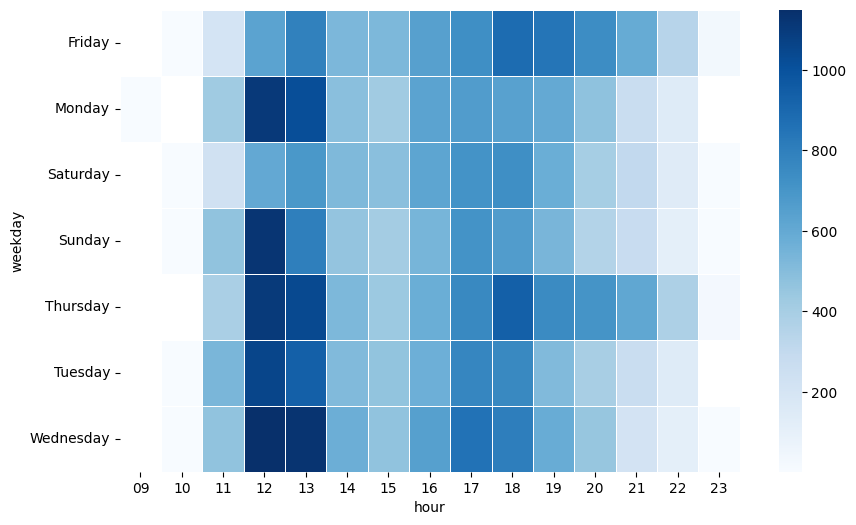

In [200]:
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(pivot, ax = ax, cmap = "Blues", linewidth = 0.5)

### Ans: It looks like peak sales happen at 12 to 1 pm on most days

# Q2. Most popular pizzas

In [201]:
set(df["pizza_name"])

{'The Barbecue Chicken Pizza',
 'The Big Meat Pizza',
 'The Brie Carre Pizza',
 'The Calabrese Pizza',
 'The California Chicken Pizza',
 'The Chicken Alfredo Pizza',
 'The Chicken Pesto Pizza',
 'The Classic Deluxe Pizza',
 'The Five Cheese Pizza',
 'The Four Cheese Pizza',
 'The Greek Pizza',
 'The Green Garden Pizza',
 'The Hawaiian Pizza',
 'The Italian Capocollo Pizza',
 'The Italian Supreme Pizza',
 'The Italian Vegetables Pizza',
 'The Mediterranean Pizza',
 'The Mexicana Pizza',
 'The Napolitana Pizza',
 'The Pepper Salami Pizza',
 'The Pepperoni Pizza',
 'The Pepperoni, Mushroom, and Peppers Pizza',
 'The Prosciutto and Arugula Pizza',
 'The Sicilian Pizza',
 'The Soppressata Pizza',
 'The Southwest Chicken Pizza',
 'The Spicy Italian Pizza',
 'The Spinach Pesto Pizza',
 'The Spinach Supreme Pizza',
 'The Spinach and Feta Pizza',
 'The Thai Chicken Pizza',
 'The Vegetables + Vegetables Pizza'}

In [202]:
# Remove "The" at the start and "Pizza" at the end from all the names of "pizza_name" col
df["pizza_name"] = df["pizza_name"].apply(lambda x : x.split("The ")[1])
df["pizza_name"] = df["pizza_name"].apply(lambda x : x.split(" Pizza")[0])

In [203]:
set(df["pizza_name"])

{'Barbecue Chicken',
 'Big Meat',
 'Brie Carre',
 'Calabrese',
 'California Chicken',
 'Chicken Alfredo',
 'Chicken Pesto',
 'Classic Deluxe',
 'Five Cheese',
 'Four Cheese',
 'Greek',
 'Green Garden',
 'Hawaiian',
 'Italian Capocollo',
 'Italian Supreme',
 'Italian Vegetables',
 'Mediterranean',
 'Mexicana',
 'Napolitana',
 'Pepper Salami',
 'Pepperoni',
 'Pepperoni, Mushroom, and Peppers',
 'Prosciutto and Arugula',
 'Sicilian',
 'Soppressata',
 'Southwest Chicken',
 'Spicy Italian',
 'Spinach Pesto',
 'Spinach Supreme',
 'Spinach and Feta',
 'Thai Chicken',
 'Vegetables + Vegetables'}

In [204]:
# create new table/dataframe for new viz
popular_pizzas_heatmap = df.groupby(["pizza_name", "pizza_size"])["quantity"].sum().reset_index(name = "count")
popular_pizzas_heatmap

,pizza_name,pizza_size,count
0,Barbecue Chicken,L,992
1,Barbecue Chicken,M,956
2,Barbecue Chicken,S,484
3,Big Meat,S,1914
4,Brie Carre,S,490
...,...,...,...
86,Thai Chicken,M,481
87,Thai Chicken,S,480
88,Vegetables + Vegetables,L,427
89,Vegetables + Vegetables,M,635


In [205]:
# Create pivot table 
pivot = popular_pizzas_heatmap.pivot(index = "pizza_name", columns = "pizza_size", values = "count")
pivot

pizza_size,L,M,S,XL,XXL
pizza_name,,,,,
Barbecue Chicken,992.0,956.0,484.0,NaN,NaN
Big Meat,NaN,NaN,1914.0,NaN,NaN
Brie Carre,NaN,NaN,490.0,NaN,NaN
Calabrese,276.0,562.0,99.0,NaN,NaN
California Chicken,927.0,944.0,499.0,NaN,NaN
Chicken Alfredo,188.0,703.0,96.0,NaN,NaN
Chicken Pesto,399.0,276.0,298.0,NaN,NaN
Classic Deluxe,473.0,1181.0,799.0,NaN,NaN
Five Cheese,1409.0,NaN,NaN,NaN,NaN


<Axes: xlabel='pizza_size', ylabel='pizza_name'>

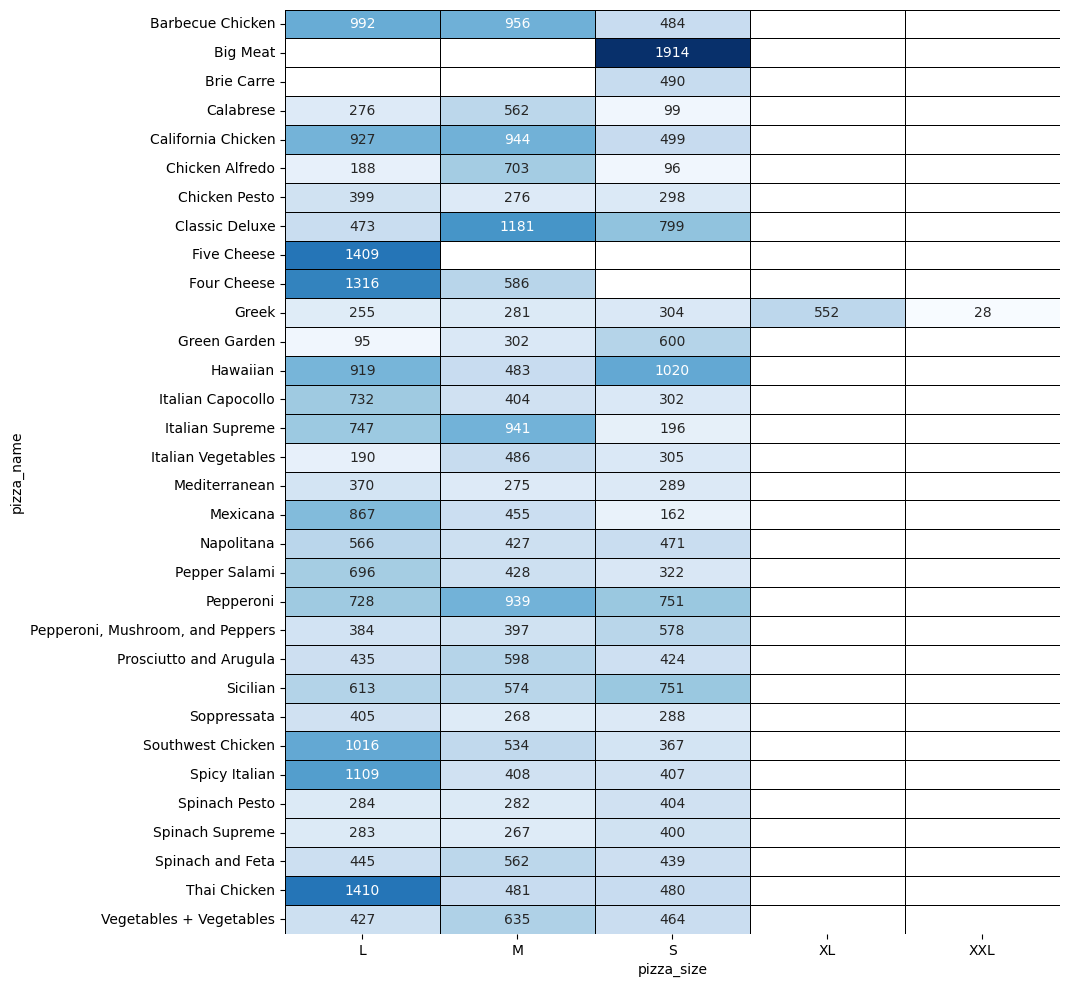

In [206]:
f, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(
    pivot, 
    ax = ax, 
    cmap = "Blues", 
    linewidth = 0.5, 
    linecolor = "black", 
    annot = True, 
    cbar = False, 
    fmt = ".0f"
)

### Ans: It looks like the 5 most popular pizzas are 
1. Big Meat Small size (outlier as small is the only size available)
2. Thai Chicken Large
3. Five Cheese Large
4. Four Cheese Large
5. Classic Deluxe MEdium

<Axes: xlabel='pizza_size', ylabel='pizza_name'>

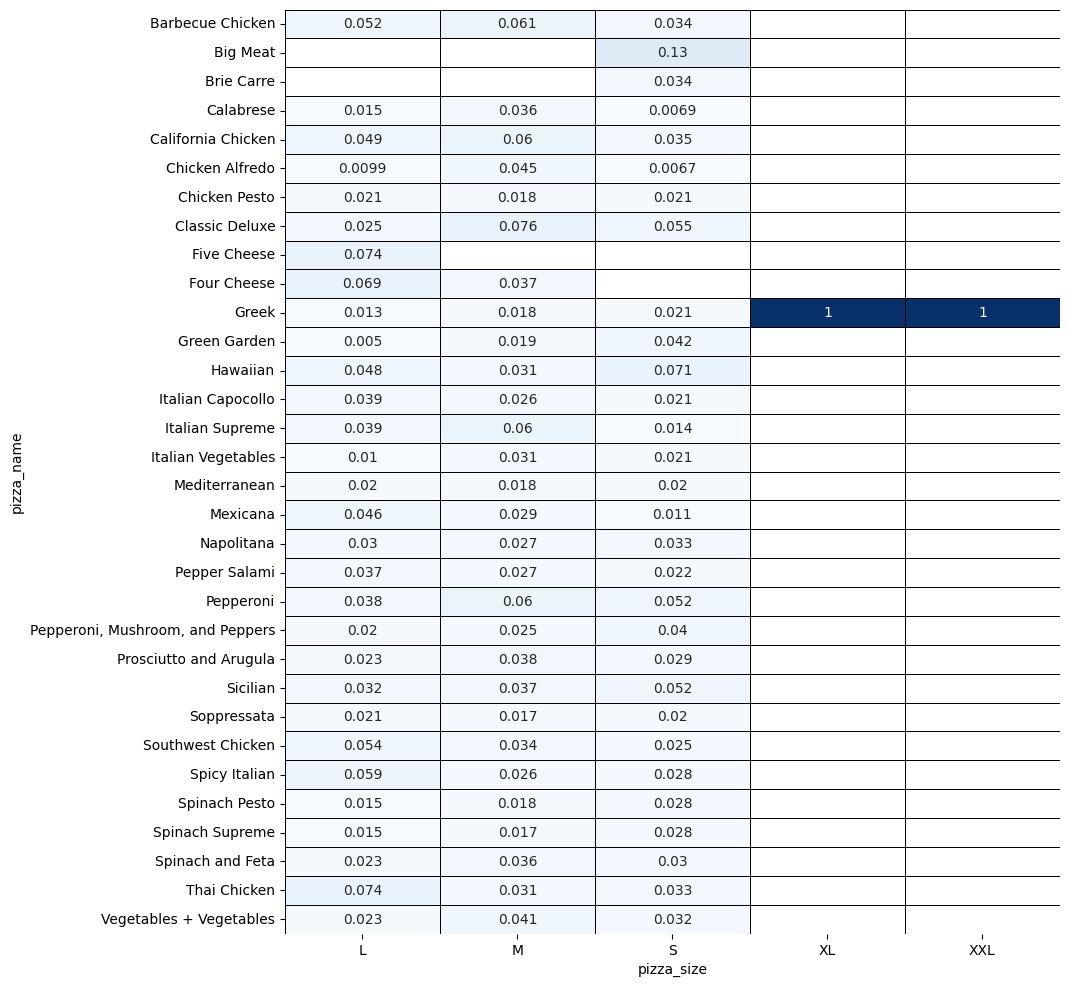

In [207]:
f, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(
    pivot.apply(lambda x : x/x.sum()), 
    ax = ax, 
    cmap = "Blues", 
    linewidth = 0.5, 
    linecolor = "black", 
    annot = True, 
    cbar = False
)

In [208]:
# remove XL and XXL from the viz as they are the only options and overshadow the rest 
popular_pizzas_heatmap = popular_pizzas_heatmap[popular_pizzas_heatmap["pizza_size"].isin(["S", "M", "L"])]

In [209]:
# Create pivot table 
pivot = popular_pizzas_heatmap.pivot(index = "pizza_name", columns = "pizza_size", values = "count")
pivot

pizza_size,L,M,S
pizza_name,,,
Barbecue Chicken,992.0,956.0,484.0
Big Meat,NaN,NaN,1914.0
Brie Carre,NaN,NaN,490.0
Calabrese,276.0,562.0,99.0
California Chicken,927.0,944.0,499.0
Chicken Alfredo,188.0,703.0,96.0
Chicken Pesto,399.0,276.0,298.0
Classic Deluxe,473.0,1181.0,799.0
Five Cheese,1409.0,NaN,NaN


<Axes: xlabel='pizza_size', ylabel='pizza_name'>

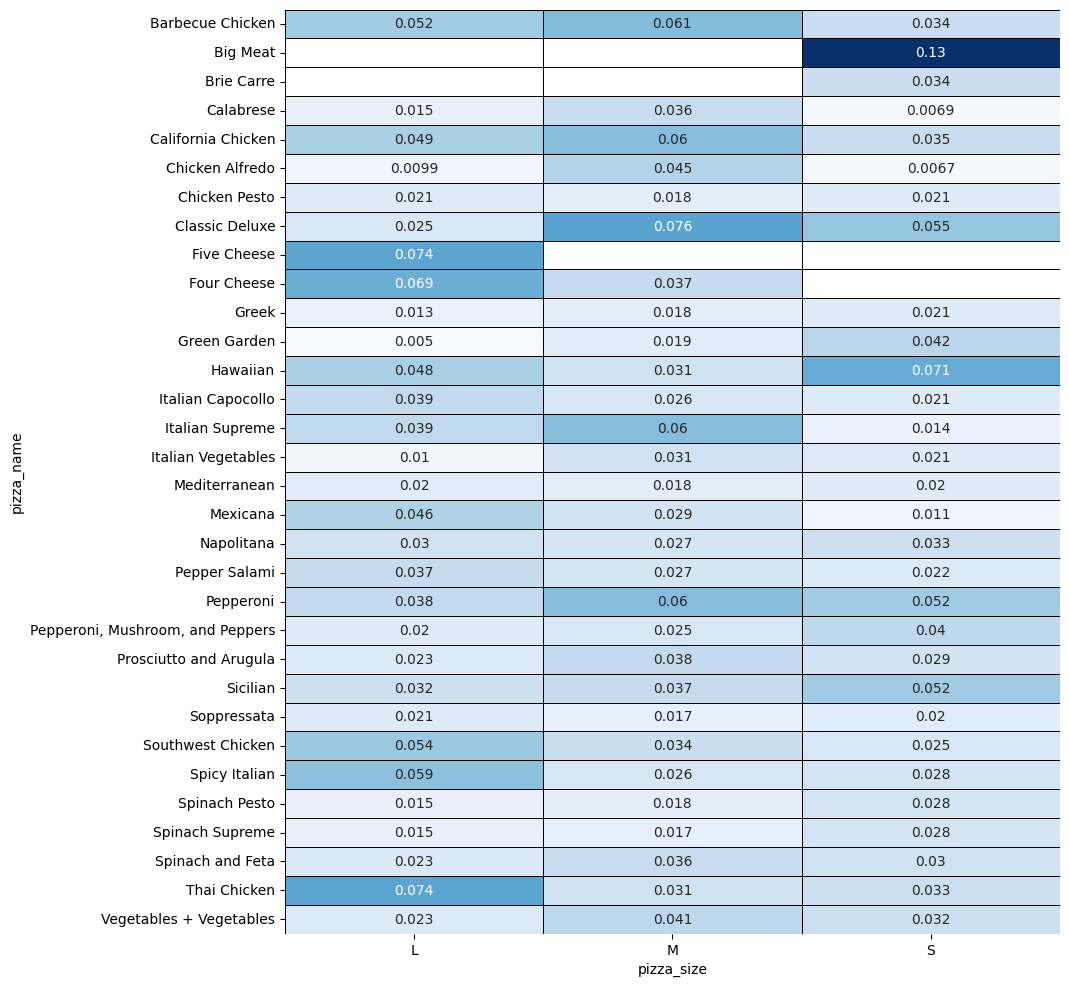

In [210]:
f, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(
    pivot.apply(lambda x : x/x.sum()), 
    ax = ax, 
    cmap = "Blues", 
    linewidth = 0.5, 
    linecolor = "black", 
    annot = True, 
    cbar = False
)

### Ans: Among the standard sizes 
1. In Large size: Five Cheese and Thai Chicken are most popular
2. In Medium size: Classic Deluxe is most popular
3. In Small size: Big Meat and Hawaiin is most popular

# Q3: Most popular ingredients

In [211]:
df["pizza_ingredients"] = df["pizza_ingredients"].apply(lambda x : x.split(","))

In [212]:
df["pizza_ingredients"]

0             [Sliced Ham,  Pineapple,  Mozzarella Cheese]
1        [Pepperoni,  Mushrooms,  Red Onions,  Red Pepp...
2        [Mozzarella Cheese,  Provolone Cheese,  Smoked...
3        [Calabrese Salami,  Capocollo,  Tomatoes,  Red...
4        [Tomatoes,  Red Peppers,  Jalapeno Peppers,  R...
                               ...                        
48615    [Chicken,  Red Onions,  Red Peppers,  Mushroom...
48616    [Ricotta Cheese,  Gorgonzola Piccante Cheese, ...
48617    [Tomatoes,  Anchovies,  Green Olives,  Red Oni...
48618    [Tomatoes,  Red Peppers,  Jalapeno Peppers,  R...
48619    [Barbecued Chicken,  Red Peppers,  Green Peppe...
Name: pizza_ingredients, Length: 48620, dtype: object

In [213]:
ingredient_dict = {}

for pizza in df["pizza_ingredients"]:
    for ingredient in pizza:
        if ingredient in ingredient_dict:
            ingredient_dict[ingredient] += 1
        else:
            ingredient_dict[ingredient] = 1

ingredient_dict

{'Sliced Ham': 2370,
 ' Pineapple': 4685,
 ' Mozzarella Cheese': 6605,
 'Pepperoni': 3758,
 ' Mushrooms': 8114,
 ' Red Onions': 19547,
 ' Red Peppers': 16284,
 ' Bacon': 2416,
 'Mozzarella Cheese': 3728,
 ' Provolone Cheese': 1359,
 ' Smoked Gouda Cheese': 1359,
 ' Romano Cheese': 1359,
 ' Blue Cheese': 1359,
 ' Garlic': 27422,
 'Calabrese Salami': 1849,
 ' Capocollo': 3271,
 ' Tomatoes': 23694,
 ' Green Olives': 6174,
 'Tomatoes': 2907,
 ' Jalapeno Peppers': 5643,
 ' Cilantro': 3341,
 ' Corn': 3341,
 ' Chipotle Sauce': 3341,
 'Chicken': 8443,
 ' Thai Sweet Chilli Sauce': 2315,
 'Prosciutto di San Daniele': 1428,
 ' Arugula': 1428,
 'Barbecued Chicken': 2372,
 ' Green Peppers': 5224,
 ' Barbecue Sauce': 2372,
 'Kalamata Olives': 1406,
 ' Feta Cheese': 4748,
 ' Beef Chuck Roast': 1406,
 'Spinach': 5239,
 ' Pepperoni': 6542,
 ' Artichokes': 5682,
 ' Kalamata Olives': 1863,
 ' Asiago Cheese': 3342,
 'Capocollo': 3301,
 ' Goat Cheese': 3301,
 ' Oregano': 1414,
 ' Peperoncini verdi': 1887,


In [214]:
# sort dict by values and slice top 10 
sorted(ingredient_dict.items(), key = lambda item : item[1], reverse = True)[:10]

[(' Garlic', 27422),
 (' Tomatoes', 23694),
 (' Red Onions', 19547),
 (' Red Peppers', 16284),
 ('Chicken', 8443),
 (' Mushrooms', 8114),
 (' Mozzarella Cheese', 6605),
 (' Pepperoni', 6542),
 (' Green Olives', 6174),
 (' Artichokes', 5682)]

### Ans: Most popular ingredients 
1. Garlic
2. Tomatoes
3. Red Onions

# Q4: Highest revenue pizzas

In [215]:
df.groupby(["pizza_name"])["total_price"].sum().sort_values(ascending = False).head(10)

pizza_name
Thai Chicken          43434.25
Barbecue Chicken      42768.00
California Chicken    41409.50
Classic Deluxe        38180.50
Spicy Italian         34831.25
Southwest Chicken     34705.75
Italian Supreme       33476.75
Hawaiian              32273.25
Four Cheese           32265.70
Sicilian              30940.50
Name: total_price, dtype: float64

In [216]:
df.groupby(["pizza_id"])["total_price"].sum().sort_values(ascending = False).head(10)

pizza_id
thai_ckn_l       29257.50
five_cheese_l    26066.50
four_cheese_l    23622.20
spicy_ital_l     23011.75
big_meat_s       22968.00
southw_ckn_l     21082.00
bbq_ckn_l        20584.00
cali_ckn_l       19235.25
classic_dlx_m    18896.00
mexicana_l       17556.75
Name: total_price, dtype: float64

### Ans: Highest revenue pizza is Thai Chicken

# Q5: All about orders
* Avg order
* Biggest order
* Avg pizzas ordered

In [217]:
# Avg amount of pizzas ordered per order
df["quantity"].sum() / df["order_id"].nunique()

2.321967213114754

In [218]:
# Avg amount of money spent per order
df["total_price"].sum() / df["order_id"].nunique()

38.30726229508197

In [219]:
# Biggest order in terms of size and money spent
df.groupby(["order_id"])[["quantity", "total_price"]].sum().sort_values("quantity", ascending = False).head(10)

,quantity,total_price
order_id,,
18845,28,444.20
10760,25,417.15
18513,15,257.00
21158,15,243.50
20163,15,232.50
17464,15,261.00
20839,15,250.95
2075,15,249.80
1685,15,272.75


In [220]:
# Most popular order sizes, how many pizzas are ordered the most or what is the most popular amt of pizzas to be ordered
orders = df.groupby(["order_id"])[["quantity"]].sum().value_counts().reset_index("quantity").sort_values("quantity")
orders

,quantity,count
0,1,8111
1,2,6152
2,3,3207
3,4,3122
4,5,145
5,6,80
9,7,61
6,8,67
8,9,64
11,10,56


<Axes: xlabel='quantity', ylabel='count'>

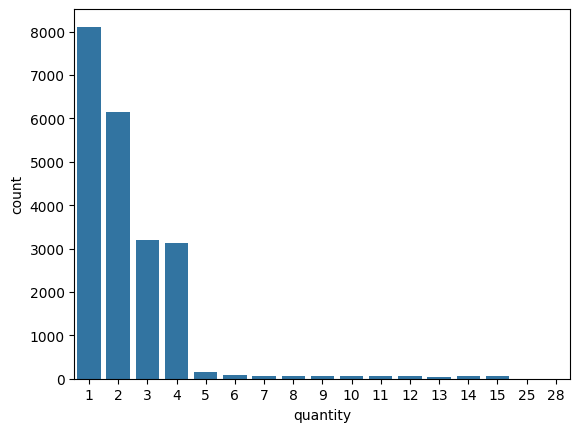

In [221]:
# change y axis to logarithmic axis - increase value by powers of 10
sns.barplot(x = "quantity", y = "count", data = orders)

<Axes: xlabel='quantity', ylabel='count'>

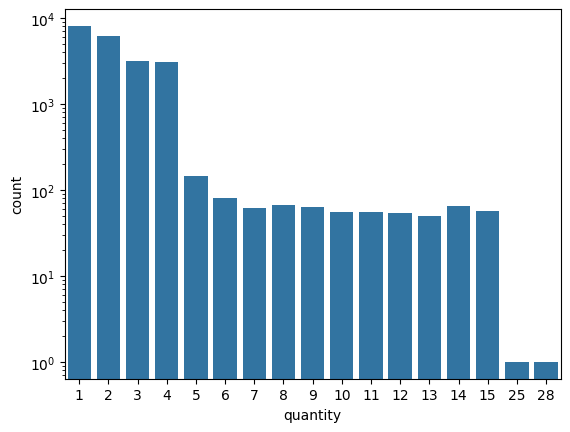

In [222]:
# change y axis to logarithmic axis - increase value by powers of 10 since in the above chart the dominant values obscure other details
sns.barplot(x = "quantity", y = "count", data = orders, log = True)

# Q6: 2-Pizza combos
* If a single order has more than 1 pizza and they are different pizzas, what are the most common 2-pizza combinations per order

In [223]:
# Create a new col "full_order" which lists all pizzas ordered in that one order and join them by "-"
df["full_order"] = df.groupby(["order_id"])["pizza_name"].transform(lambda x : "-".join(x))
df["full_order"]

0                                                 Hawaiian
1        Classic Deluxe-Five Cheese-Italian Supreme-Mex...
2        Classic Deluxe-Five Cheese-Italian Supreme-Mex...
3        Classic Deluxe-Five Cheese-Italian Supreme-Mex...
4        Classic Deluxe-Five Cheese-Italian Supreme-Mex...
                               ...                        
48615               Chicken Alfredo-Four Cheese-Napolitana
48616               Chicken Alfredo-Four Cheese-Napolitana
48617               Chicken Alfredo-Four Cheese-Napolitana
48618                                             Mexicana
48619                                     Barbecue Chicken
Name: full_order, Length: 48620, dtype: object

In [224]:
# Create new data frame "combos" to see unqiue full orders
combos = df[["order_id", "full_order"]].drop_duplicates()
combos

,order_id,full_order
0,1,Hawaiian
1,2,Classic Deluxe-Five Cheese-Italian Supreme-Mex...
6,3,Italian Supreme-Prosciutto and Arugula
8,4,Italian Supreme
9,5,Italian Supreme
...,...,...
48607,21346,Big Meat-California Chicken-California Chicken...
48611,21347,Barbecue Chicken-Italian Supreme-Pepper Salami...
48615,21348,Chicken Alfredo-Four Cheese-Napolitana
48618,21349,Mexicana


In [225]:
# Iterate through each of the full_order cells, combine all unique combos of order list elements, see which of these are most occurring
from itertools import combinations
from collections import Counter

In [226]:
count = Counter()

# for a list of 3 pizza combinations we would have ab, bc, ac as the 2 pizza combos. The counter counts how many of these combinations are in the list
for row in df["full_order"]:
    row_list = row.split("-")
    count.update(Counter(combinations(row_list, 2))) # here 2 is for 2 pizza combo, for 3-pizza combo set 3. 

print(count)

Counter({('Hawaiian', 'Thai Chicken'): 2185, ('Classic Deluxe', 'Hawaiian'): 2105, ('Classic Deluxe', 'Pepperoni'): 2040, ('Hawaiian', 'Pepperoni'): 1996, ('Pepperoni', 'Thai Chicken'): 1981, ('Barbecue Chicken', 'Hawaiian'): 1961, ('Barbecue Chicken', 'Pepperoni'): 1929, ('Barbecue Chicken', 'California Chicken'): 1912, ('California Chicken', 'Hawaiian'): 1905, ('Classic Deluxe', 'Thai Chicken'): 1887, ('Hawaiian', 'Sicilian'): 1885, ('California Chicken', 'Thai Chicken'): 1852, ('Barbecue Chicken', 'Thai Chicken'): 1849, ('Barbecue Chicken', 'Sicilian'): 1824, ('Classic Deluxe', 'Sicilian'): 1820, ('Pepperoni', 'Southwest Chicken'): 1815, ('California Chicken', 'Pepperoni'): 1792, ('Barbecue Chicken', 'Classic Deluxe'): 1750, ('California Chicken', 'Classic Deluxe'): 1737, ('Hawaiian', 'Spicy Italian'): 1715, ('Pepperoni', 'Sicilian'): 1712, ('California Chicken', 'Sicilian'): 1711, ('Sicilian', 'Thai Chicken'): 1704, ('Classic Deluxe', 'Four Cheese'): 1702, ('Hawaiian', 'Southwest C